# Limpeza do Texto Recuperado
Conserta falhas e erros no reconhecimento dos caracteres. Junta duas sessões que foram separadas em uma única lista

In [4]:
# SPDX-License-Identifier: GPL-3.0-or-later
""" Modelo do Sistema Circulatório em forma de grafo para simulação com Nanorobôs.

.. codeauthor:: Carlo Oliveira <carlo@ufrj.br>

Changelog
---------

.. versionadded::    22.05

    Leitura da planilha de artérias.
"""
__version__ = "22.05"
with open("arterias/arterias.txt", "r") as arquivo_veias, open("arterias/arterias.csv", "w") as veia_csv:
    veias = arquivo_veias.read()
    ini = "T3 x terminal auperior da a. carebral módia (2) 8"
    fim = "Table 2: Dados geométricos das artérias do cérebro. (n): número total de ocorrências"
    param_veias = veias.split(ini)[1].split(fim)[0]
    param_veias = param_veias.replace("T","7")
    param_veias = param_veias.replace("-",".")
    param_veias = param_veias.replace(" 0 "," 0.")
    param_veias = param_veias.replace("O","0")
    param_veias = param_veias.replace("..",".")
    param_veias = param_veias.replace(" 10."," 0.")
    param_veias = param_veias.replace(" 09."," 0.")
    param_veias = param_veias.replace(" 86."," 6.")
    param_veias = param_veias.replace(" 0.3765"," 0.2765")
    param_veias = param_veias.replace(" 0.0809"," 0.0309")
    param_veias = param_veias.replace(" 0.07973"," 0.0292")
    param_veias = param_veias.split('\n')
    param_veias = [linha.split() for linha in param_veias if linha]
    veias = veias.replace("(2)"," (2)")
    veias = veias.replace(" àa "," a ")
    veias = veias.replace(" aà. "," a ")
    veias = veias.replace(" aà "," a ")
    veias = veias.replace(" x "," r ")
    veias = veias.replace("9D a","9 a")
    veias = veias.replace(" a "," a. ")
    veias = veias.replace(" r "," r. ")
    veias = veias.replace("680 r. ","60 r. ")
    veias = veias.replace(" à "," a. ")
    veias = veias.replace("37  p","37 a. p")
    veias = veias.replace("38  p","38 a. p")
    veias = veias.replace("39  p","39 a. p")
    veias = veias.split('\n')
    veias = [linha for linha in veias if linha]

    nome_veias = [linha.replace("T", "7") for linha in veias if (" a. " in linha) or( " r. " in linha)]
    nome_v_vet = [vetor.split()[:-2] for vetor in nome_veias]
    nome_veias = [" ".join([l[0]]+ l[2:][-2:]) for l in nome_v_vet]
    #nome_veias = [" ".join([l.split()[0]]+l[:-6].split()[min(len(nome_veias)):]) for l in nome_veias]
    #[print(l) for l in nome_veias]
    # print(len(nome_veias))
    #[print(f"{n} {l}") for n, l in enumerate(param_veias)]

    #print(len(param_veias))
    nome_params = zip(nome_veias, param_veias)
    veias_param = [[nome]+params for nome, params in nome_params]
    head = "Nome do vaso,Cmin(cm),Cmax(cm),R(cm),h(cm)".split(',')
    veias_param = [head]+veias_param
    from csv import writer
    cvs_write = writer(veia_csv)
    def not_number(num):
        try:
            float(num)
            return False
        except ValueError:
            return True
    [cvs_write.writerow(line) for line in veias_param]
    #[print(line) for line in veias_param] # if not_number(line[1])]
    [print(line) for line in veias_param[1:] if float(line[2])>10] # if not_number(line[1])]


['3 carótida Interna', '13.710', '13.710', '0.2765', '0.05477']
['36 vartabral', '21.1390', '21.190', '0.1935', '0.0365']


# Observando Os Dados Das Veias

Importando os dados das veias no dataframe para estudar o perfil.


In [5]:
with open("arterias/arterias.csv", "r") as veia_csv:
    #The easiest way to do this :

    import pandas as pd
    df = pd.read_csv ('arterias/arterias.csv')
df

,Nome do vaso,Cmin(cm),Cmax(cm),R(cm),h(cm)
0,1 basilar,2.27,2.23777,0.17340,0.04360
1,2 calosomarginal,4.78,4.78000,0.06230,0.02080
2,3 carótida Interna,13.71,13.71000,0.27650,0.05477
3,4 central póstaromedial,0.27,0.29000,0.02060,0.00790
4,5 infarior antaerior,3.75,3.75000,0.03660,0.01340
...,...,...,...,...,...
68,69 cerebra! méódia,2.99,3.99000,0.05000,0.01750
69,70 occlpital lateral,2.07,2.07000,0.09375,0.01360
70,71 corebral módia,5.76,5.77600,0.05000,0.01750
71,72 cereabral média,7.21,7.21000,0.08160,0.02690


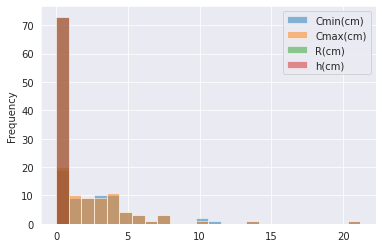

In [6]:
ax = df.plot.hist(bins=24, alpha=0.5)

# Distribuição das Características dos Vasos

Observando as distribuições, temos que será possivel classificar os valores em grupos: alto, médio, baixo.

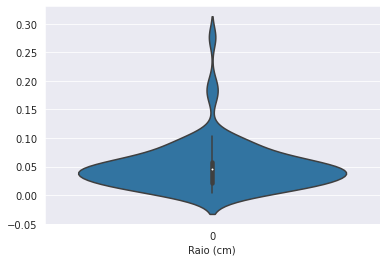

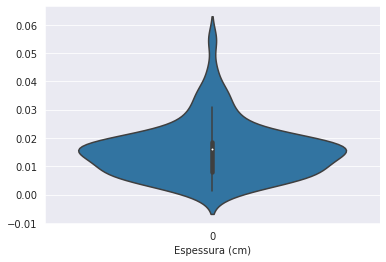

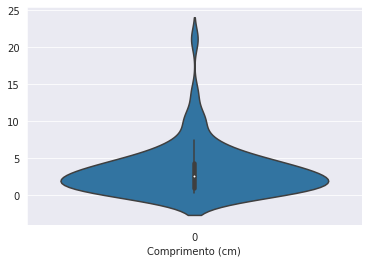

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
dataFrame = pd.read_csv("arterias/arterias.csv")
# sb.violinplot(data=dataFrame)

# plotting violin plot with Weight (kgs)
sb.violinplot(data=dataFrame['R(cm)'])
plt.xlabel("Raio (cm)")
# display
plt.show()
sb.violinplot(data=dataFrame['h(cm)'])
# set label
plt.xlabel("Espessura (cm)")
# display
plt.show()
sb.violinplot(data=dataFrame['Cmin(cm)'])
# set label
plt.xlabel("Comprimento (cm)")
# display
plt.show()

## Organizando Vasos em Grupos
Observando as distribuições vamos dividir os vasos segundo sus espessura.

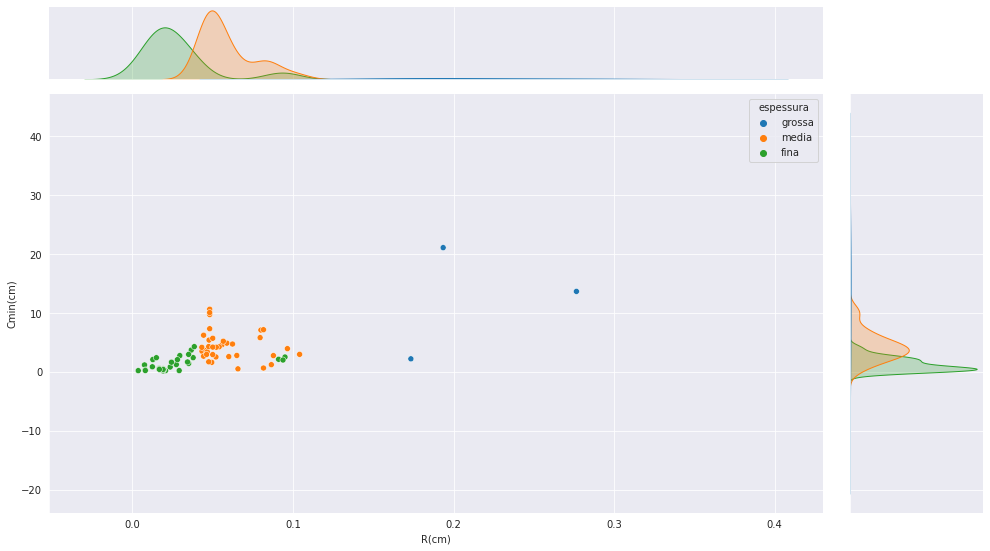

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
df = pd.read_csv("arterias/arterias.csv")
hcm = df['h(cm)']
# df['espessura'] = "alta" if hcm > 0.05 else 'media' if 0.2 < hcm <= 0.05 else 'baixa'
# g, f = 0.025, 0.015
g, f = 0.036, 0.015
df['espessura'] = [
    "grossa" if h > g else 'media' if f < h <= g else 'fina' for h in hcm]
# df
sns.jointplot(data=df, x="R(cm)", y="Cmin(cm)", hue="espessura", ax = ax)
plt.gcf().set_size_inches(15, 8)

## Organizando Vasos em Grupos de Calibre
Observando as distribuições vamos dividir os vasos segundo seu calibre.

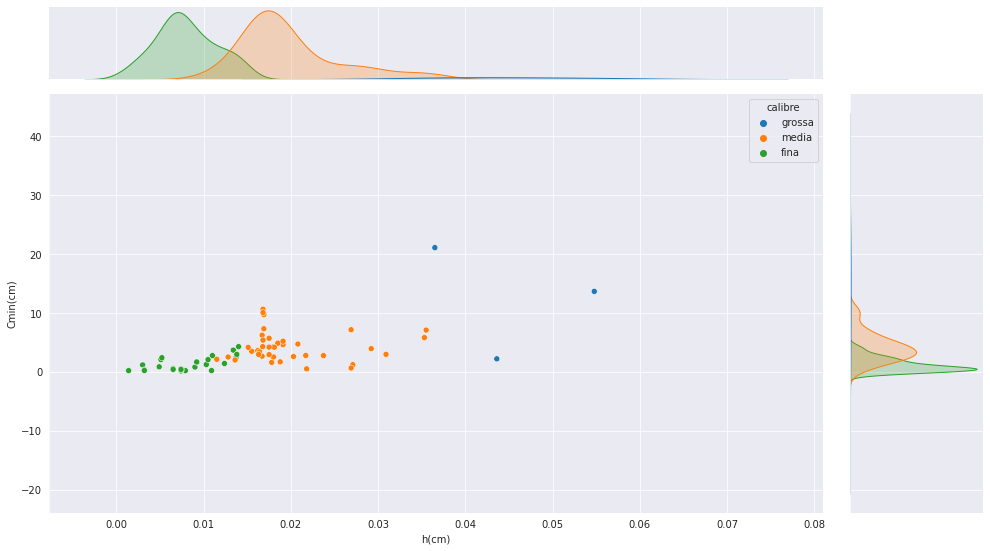

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file into a Pandas DataFrame:
df = pd.read_csv("arterias/arterias.csv")
rcm = df['R(cm)']
g, f = 0.15, 0.04
df['calibre'] = [
    "grossa" if h > g else 'media' if f < h <= g else 'fina' for h in rcm]
#    "grossa" if h > 0.02 else 'media' if 0.015 < h <= 0.03 else 'fina' for h in hcm]
# df
sns.jointplot(data=df, x="h(cm)", y="Cmin(cm)", hue="calibre", ax = ax)
plt.gcf().set_size_inches(15, 8)

# Heurística para criar um modelo do Sistema Circulatório
Usando um algoritmo genético para criar um grafo do sistema circulatório

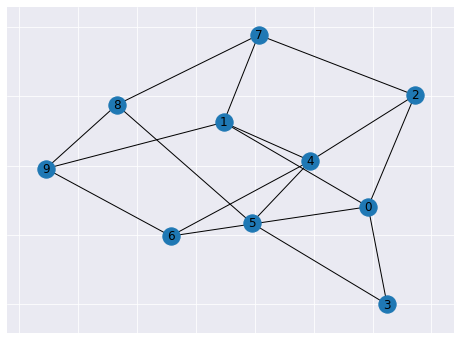

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
nx.add_path(G, [3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
nx.add_path(G, [3, 0, 6, 4, 2, 7, 1, 9, 8, 5])
# G.add_path([3, 0, 6, 4, 2, 7, 1, 9, 8, 5])
plt.figure(figsize=(8,6))

nx.draw_networkx(G, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)

plt.show()


## Rascunho para o entroncamento entre artérias
Uma artéria é aferente e duas eferentes. A soma das seções retas da eferentes deve se aproximar da eferente.

In [44]:
df = pd.read_csv("arterias/arterias.csv")
class Entroncamento:
    def __init__(self):
        a, l, r = df.sample(5), df.sample(5), df.sample(5)
        self.a = df.loc[df['Cmin(cm)'] == max(a["Cmin(cm)"])].iloc[-1].name
        self.l = df.loc[df['R(cm)'] == min(l["R(cm)"])].iloc[-1].name
        self.r = df.loc[df['R(cm)'] == min(r["R(cm)"])].iloc[-1].name
        self.ar = df.loc[self.a]['R(cm)']
        self.ac = df.loc[self.a]['Cmin(cm)']
        self.lr = df.loc[self.l]['R(cm)']
        self.lc = df.loc[self.l]['Cmin(cm)']
        self.rr = df.loc[self.r]['R(cm)']
        self.rc = df.loc[self.r]['Cmin(cm)']

e = Entroncamento()
print(e.a, e.ar, e.ac, e.l, e.r)
print("rfit", r:=abs(e.ar - 0.6*(e.rr + e.lr)))
print("cfit", c:=abs(e.ac - 0.5*(e.rc + e.lc)))
print("tfit", c*r)

24 0.0795 5.87 62 21
rfit 0.05058
cfit 5.495
tfit 0.2779371


## Processamento do algoritmo genético
O conjunto de artérias devem montar um grafo iniciado por artéria longas e grossas e terminando por curtas e finas.

In [1]:
import genetic_algorithms as ga
import random

import pandas as pd
df = pd.read_csv ('arterias/arterias.csv')
"""DataFrame com as informações das artérias"""

# noinspection PyAttributeOutsideInit
class Vaso(ga.MemberBase):
    def _construct_from_params(self, construction_parameters=None):
        # Set the parameters as passed by the generator
        def params():
            """Coleta três amostras de artérias para o entroncamento.

            :return: Dicionário com o os nomes das artéria escolhidas.
            """
            a_, l_, r_ = df.sample(5), df.sample(5), df.sample(5)
            return dict(
                a = df.loc[df['Cmin(cm)'] == max(a_["Cmin(cm)"])].iloc[-1].name,
                l = df.loc[df['R(cm)'] == min(l_["R(cm)"])].iloc[-1].name,
                r = df.loc[df['R(cm)'] == min(r_["R(cm)"])].iloc[-1].name

        )
        cp = params()
        self.vases = [df.loc[cp[vase]].name for vase in "alr"]
        self.ar, self.ac, self.lr, self.lc,self.rr, self.rc = [
            df.loc[cp[chave]][param] for chave in "alr" for param in "R(cm) Cmin(cm)".split()]

    def mutate(self):
        # Mutate by adding 1 or -1 to our door height and width.
        if 1 <= random.randrange(10):
            return
        raios = (self.ar, self.lr, self.rr)
        comprimentos = (self.ac, self.lc, self.lc)
        self.ar, self.lr, self.rr = [r_+ 0.001*pow(-1, random.randrange(2)) for r_ in raios]
        self.ac, self.lc, self.rc = [r_+ 0.1*pow(-1, random.randrange(2)) for r_ in comprimentos]

    def crossover(self, pairing):
        # Again a bad example of a crossover, the mean we will converge quickly but very hard to get a precice score.
        from random import choice
        new_params = {vase: choice([me, you]) for vase, me, you in
                      zip(list("alr"), self.vases, pairing.vases)}

        return Vaso(construction_parameters=new_params)

    def __repr__(self):
        rep = f"ar: {self.ar:.2f}|lr: {self.lr:.2f}|rr: {self.rr:.2f}" \
              f"|ac: {self.ac:.2f}|lc: {self.lc:.2f}|rc: {self.rc:.2f}| vs: {self.vases}"
        return rep


def fit_artery_junction_anatomy(member: Vaso):
    e = member
    raio = abs(e.ar - 0.6*(e.rr + e.lr))
    comp = abs(e.ac - 0.5*(e.rc + e.lc))
    return 1/(10*raio + comp + 0.000000000001)

def param_generator_():
    def params():
        a_, l_, r_ = df.sample(5), df.sample(5), df.sample(5)
        return dict(
            a = df.loc[df['Cmin(cm)'] == max(a_["Cmin(cm)"])].iloc[-1].name,
            l = df.loc[df['R(cm)'] == min(l_["R(cm)"])].iloc[-1].name,
            r = df.loc[df['R(cm)'] == min(r_["R(cm)"])].iloc[-1].name

        )
    yield params()

def param_generator():
    from random import choices
    yield {a : name for a, name in zip(list("alr"), choices(range(1,72), k=3))}

#random.seed(1)
pop = ga.Population(50, Vaso, fit_artery_junction_anatomy, member_parameters_generator=param_generator)
# run 500 generations before checking we have some parameters changed
pop.run(generations=200, print_logging=True) #, maximise_fitness_func=False)
print("Best door:", pop.get_top())
# [print( ind.construction_parameters) for ind in pop.population]
[print( ind) for ind in pop.population]
# returns what almost exactly what we want:
# Best door: (height: 9.999995902180672 | width: 3.999865485355258, 244033.23286180547)

-----------------------
Running generation 1
Scored members.
Population score stats:
| Best Score: 3.498950314893283 | Worst Score: 0.04429329603247034 | Mean Score: 0.2974934709044135 |

-----------------------
Running generation 2
Scored members.
Population score stats:
| Best Score: 1.4686013041158024 | Worst Score: 0.044134911597770124 | Mean Score: 0.20244433533273504 |

-----------------------
Running generation 3
Scored members.
Population score stats:
| Best Score: 0.6151877553025399 | Worst Score: 0.044134911597770124 | Mean Score: 0.15751927175269378 |

-----------------------
Running generation 4
Scored members.
Population score stats:
| Best Score: 0.5590589919045131 | Worst Score: 0.044134911597770124 | Mean Score: 0.15891803042802533 |

-----------------------
Running generation 5
Scored members.
Population score stats:
| Best Score: 0.5237466742083444 | Worst Score: 0.044134911597770124 | Mean Score: 0.14394631468770294 |

-----------------------
Running generation 6
Sco

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]